Decorator function - Modifies behaviour of an input function

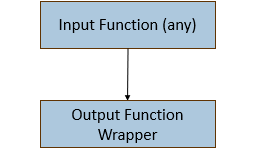

# Create a decorator to Welcome the user and thank the user in end

In [3]:
def welcome(func):
    def wrapper(*args, **kwargs):
        print('Welcome to this function')
        result = func(*args, **kwargs)
        print(f"Function Result : {result}")
        print('Thank you for using this function')
        return result
    return wrapper

### Implementing decorator

@decorator-name

def function...

In [2]:
@welcome
def hypotenuse(a,b):
    c = (a**2 + b**2)**(1/2)
    return c

In [4]:
hypotenuse(3,4)

Welcome to this function
5.0
Thank you for using this function


5.0

In [5]:
h2 = hypotenuse(5, 7)

Welcome to this function
8.602325267042627
Thank you for using this function


In [6]:
h2

8.602325267042627

In [7]:
@welcome
def get_squares(n):
    return n**2

In [8]:
get_squares(23)

Welcome to this function
Function Result : 529
Thank you for using this function


529

In [9]:
s = get_squares(12)

Welcome to this function
Function Result : 144
Thank you for using this function


In [10]:
s

144

### Applying decorator on existing function

In [11]:
def simple_interest(P, N, R):
    I = (P*N*R)/100
    A = P + I
    return I, A

In [12]:
simple_interest(10000, 3, 6.5)

(1950.0, 11950.0)

In [13]:
simple_interest(P=35000, N=4, R=7.1)

(9940.0, 44940.0)

In [16]:
@welcome
def si_decorator(P, N, R):       #we defined new function under decorator and nested existing function in it
    return simple_interest(P, N, R)

In [17]:
si_decorator(45000, 3, 7.5)

Welcome to this function
Function Result : (10125.0, 55125.0)
Thank you for using this function


(10125.0, 55125.0)

In [18]:
si_decorator(P=56000, R=8, N=5)

Welcome to this function
Function Result : (22400.0, 78400.0)
Thank you for using this function


(22400.0, 78400.0)

## Time decorator to calculate time required for completion of a code

In [19]:
import time

In [20]:
time.sleep(3)
print('Hello World')

Hello World


In [22]:
t_start = time.time()
time.sleep(4)
print("ETLHive")
t_stop = time.time()
t = t_stop - t_start
print(f'Time Required to execute this code : {t:.2f} seconds')

ETLHive
Time Required to execute this code : 4.00 seconds


In [23]:
def time_decorator(func):
    def wrapper(*args, **kwargs):
        t_start = time.time()
        result = func(*args, **kwargs)
        print(f'Function Results : {result}')
        t_stop = time.time()
        t = t_stop - t_start
        print(f'Time required to execute this function = {t:.2f} second')
        return result
    return wrapper
        

In [24]:
@time_decorator
def print_multiple(s, time_delay, num):
    for i in range(num):
        time.sleep(time_delay)
        print(s)

In [26]:
print_multiple('Hello World', 2, 5)

Hello World
Hello World
Hello World
Hello World
Hello World
Function Results : None
Time required to execute this function = 10.00 second


In [27]:
print_multiple(s="ETLHive", time_delay=1.5, num=10)

ETLHive
ETLHive
ETLHive
ETLHive
ETLHive
ETLHive
ETLHive
ETLHive
ETLHive
ETLHive
Function Results : None
Time required to execute this function = 15.01 second


## User Authentication
To verify username and password

In [48]:
USERS = {
    'utkarshg5' :'Password@1234',
    'aditim1' : 'Example#4567',
    'sarthak' : 'Etlhive$9876'
        }

In [49]:
USERS.keys()

dict_keys(['utkarshg5', 'aditim1', 'sarthak'])

In [50]:
USERS.get("utkarshg5")

'Password@1234'

In [51]:
def authenticator(func):
    def wrapper(username, password, *args, **kwargs):
        if (username in USERS.keys()) and (password == USERS.get(username)):
            print(f'Login Successful , Welcome {username}')
            results = func(username, password, *args, **kwargs)
            print(f'Function Results : {results}')
            return results
        else:
            print('Login Failed, Please check your username and password')
    return wrapper

In [56]:
@authenticator
def compound_interest(username, password, P, N, R):
    A = P*(1+(R/100))**N
    I = A - P
    return I, A

In [55]:
compound_interest(
    username="random123",
    password="random",
    P = 45000,
    N = 5,
    R = 6.5
)

Login Failed, Please check your username and password


In [57]:
compound_intrest(
    username="aditim1",
    password="password",
    P = 45000,
    N = 5,
    R = 6.5
)

Login Failed, Please check your username and password


In [58]:
compound_intrest(
    username="ditim1",
    password="Example#4567",
    P = 45000,
    N = 5,
    R = 6.5
)

Login Failed, Please check your username and password


In [59]:
compound_intrest(
    username="aditim1",
    password="Example#4567",
    P = 45000,
    N = 5,
    R = 6.5
)

Login Successful , Welcome aditim1
Function Results : (16653.899853703108, 61653.89985370311)


(16653.899853703108, 61653.89985370311)

In [60]:
compound_intrest(
    username="sarthak",
    password="Etlhive$9876",
    P = 57000,
    N = 4,
    R = 7.1
)

Login Successful , Welcome sarthak
Function Results : (17995.074173816975, 74995.07417381697)


(17995.074173816975, 74995.07417381697)

In [61]:
compound_intrest(
    username="utkarshg5",
    password="Password@1234",
    P = 68000,
    N = 7,
    R = 8
)

Login Successful , Welcome utkarshg5
Function Results : (48540.05027700742, 116540.05027700742)


(48540.05027700742, 116540.05027700742)